# Faktor apakah yang menjual sebuah mobil?

# Konten<a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Pra-Pemrosesan](#praprocess)
    * [1.1 Eksplorasi data awal](#eksplorasi)
    * [1.2 Mengatasi nilai hilang](#missing)
    * [1.3 Memeriksa duplicates](#duplicates)
    * [1.3 Memperbaiki tipe data](#type)
* [Tahap 2. Memperbaiki kualitas data](#quality)
    * [2.1 Detail penayangan iklan](#detail)
    * [2.2 Usia kendaraan](#age)
    * [2.3 Jarak tempuh rata-rata pertahun](#odomean)
    * [2.4 Skala kolom `condition`](#scalecond)
    * [2.5 Memeriksa data bersih](#cleaned)
* [Tahap 3. Mempelajari Parameter Inti](#core)
    * [3.1 Pembuatan boxplot](#boxplot)
    * [3.2 Pembuatan histogram](#histogram)
    * [3.3 Korelasi data](#corr)
* [Tahap 4. Menangani outlier](#outlier)
* [Tahap 5. Mempelajari Parameter inti tanpa outlier](#corenooutlier)
    * [5.1 Kolom `price`](#price)
    * [5.2 Kolom `age`](#agenoout)
    * [5.3 Kolom `odometer`](#odo)
    * [5.4 Korelasi tanpa outlier](corenooutlier)
* [Tahap 6. Pengujian data](#datatest)
    * [6.1 Faktor masa berlaku iklan](#adv)
    * [6.2 Harga rata-rata setiap jenis kendaraan](#pricemean)
    * [6.3 Faktor yang mempengaruhi harga](#pricefactor)
* [Kesimpulan Umum](#conclusions)
    * [Temuan](#end)
    * [Rekomendasi](#recom)

## Pendahuluan <a id='intro'></a>
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

### Tujuan
Menguji beberapa hipotesis:
1. Apakah iklan mobil yang ditayangkan paling lama ditayangkan pada 30 hari?
2. Apakah tipe kendaraan mempengaruhi jumlah promosi iklan?
3. Apakah mobil keluarga cenderung sering diiklankan?
4. Apakah kondisi dan usia kendaraan mempengaruhi harga jual kendaraan?
5. Apakah mobil dengan warna putih cenderung mempengaruhi jumlah iklan yang ditayangkan?

### Tahapan
Data disimpan dalam file `'/datasets/vehicles_us.csv'`. Tidak ada informasi terkait kualitas data tersebut, karena itu diperlukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Pertama-tama, kita akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, kita akan mengatasi masalah yang paling serius.
 
Proyek ini terdiri dari beberapa tahap:
 1. Pra-pemrosesan data
 2. Memperbaiki kualitas data
 3. Mempelajari parameter inti
 4. Mempelajari dan menangani outliers
 5. Mepelajari parameter inti tanpa outliers
 4. Menguji data

 
[Kembali ke Konten](#back)

## Pra-pemrosesan <a id='praprocess'></a>

Libraries yang dibutuhkan untuk memproses data: `pandas`, `matplotlib.pyplot`, `seaborn` dan `numpy`

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Memuat Data

data pada `'/datasets/vehicles_us.csv'` akan dimasukkan ke dalam variable `vehicle`

In [2]:
# Muat file data menjadi DataFrame
vehicle = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal <a id='eksplorasi'></a>

Dataset berisi kolom-kolom berikut:

- `price` — harga mobil
- `model_year` — tahun pembuatan
- `model` — model mobil
- `condition`— kondisi seperti (baru, baik dll)
- `cylinders`— jumlah silinder
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — transmisi mobil seperti (gas, manual dll)
- `paint_color` — warna mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
vehicle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Dari info diatas dapat dilihat bahwa:
* dataset memiliki jumlah data `51525` dengan tipe data `float`, `int`, dan `object`.
* data set memiliki nilai hilang pada kolom `model_year`, `cylinders`, `odometer`, `paint_color` dan `is_4wd`.
* terdapat kesalahan tipe data pada kolom `date_posted` yang seharusnya `datetime`.
* data yang hilang tidak simetris tehadap kolom lainnya
* kolom dengan data hilang terbanyak adalah kolom `is_4wd`

In [4]:
# tampilkan sampel data
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Dari sampel 5 data dan info umum dapat diketahui:
1. terdapat nilai hilang pada column `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`
2. terdapat kesalahan tipe data pada column `model_years` seharusnya `integer` tapi memiliki data `float64`
3. kesalahan tipe data pada column `date_posted` seharusnya `date` tapi terdeteksi `object64`
4. kesalahan pada column `is_4wd` seharusnya `boolean` tapi memiliki data `float`
5. kolom `is_4wd` memiliki data hilang terbanyak diantara kolom lainnya


Langkah selanjutnya:
1. Untuk mengatasi data yang hilang yang harus dilakukan adalah pemeriksaan distribusi data untuk melihat hubungan apa yang mungkin ada dari data-data yang hilang
2. kemudian baru diputuskan untuk memperbaiki tipe data yang salah.

### Mengatasi Nilai-Nilai yang Hilang (Jika Ada) <a id='missing'></a>

In [5]:
#memeriksa nilai hilang pada setiap kolom
vehicle.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

dari data di atas dapat dilihat: terdapat nilai hilang pada column `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`
* kolom `cylinders` kemungkinan dipengaruhi oleh kolom `type`
* kolom `model_year` kemungkinan dipengaruhi oleh kolom `model`, `type` dan `condition`
* kolom `odometer` kemungkinan dipengaruhi oleh kolom `model_year`, `model`, `type` dan `condition`
* kolom `is_4wd` kemungkinan dipengaruhi oleh `type`
* kolom `paint_color` tidak memiliki keterangan hubungan sehingga akan diabaikan atau akan diganti menjadi `unknown`

**Data hilang pada kolom `cylinders`**

In [6]:
vehicle.loc[vehicle['cylinders'].isnull()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


dapat dilihat dari data bahwa berbagai jenis tipe mobil `type` dapat mempengaruhi ukuran cylindersnya, untuk mengisi data yang hilang kita harus membuat fungsi yang akan mengisi nilai-nilai tersebut

In [7]:
# membuat dictionary 'cylinders' yang memiliki nilai berdasarkan 'type'
dict_type_cyl = vehicle.groupby('type')['cylinders'].median().to_dict()
dict_type_cyl

{'SUV': 6.0,
 'bus': 10.0,
 'convertible': 8.0,
 'coupe': 6.0,
 'hatchback': 4.0,
 'mini-van': 6.0,
 'offroad': 6.0,
 'other': 6.0,
 'pickup': 8.0,
 'sedan': 4.0,
 'truck': 8.0,
 'van': 6.0,
 'wagon': 4.0}

In [8]:
#membuat fungsi untuk mengganti nilai hilang pada kolom 'cylinders'
def repair_cylinders(data):
    if pd.isna(data['cylinders']):
        if data['type'] in dict_type_cyl:
            return dict_type_cyl.get(data['type'])
    return data['cylinders']

# menerapkan fungsi kedalam dataframe
vehicle['cylinders'] = vehicle.apply(repair_cylinders,axis=1)

In [9]:
# pengecekan nilai yang hilang 
vehicle['cylinders'].isna().sum()

0

In [10]:
vehicle.loc[vehicle['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


sekarang data hilang pada kolom `cylinders` sudah teratasi, selanjutnya akan mengatasi nilai hilang pada kolom lainnya

**Data hilang pada kolom `model_year`**

In [11]:
#data hilang pada kolom model_year
model_year_null = vehicle.loc[vehicle['model_year'].isnull()]
model_year_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,4.0,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


kolom `model_year` kemungkinan dipengaruhi oleh kolom `model` dan `condition`

In [12]:
# membuat dictionary 'model_year' yang memiliki nilai berdasarkan 'model' dan 'condition'
dict_model_year = vehicle.groupby(['model', 'condition'])['model_year'].median().to_dict()
dict_model_year

{('acura tl', 'excellent'): 2009.0,
 ('acura tl', 'fair'): 2004.0,
 ('acura tl', 'good'): 2007.0,
 ('acura tl', 'like new'): 2007.0,
 ('bmw x5', 'excellent'): 2010.0,
 ('bmw x5', 'fair'): 2004.0,
 ('bmw x5', 'good'): 2006.0,
 ('bmw x5', 'like new'): 2009.0,
 ('buick enclave', 'excellent'): 2012.0,
 ('buick enclave', 'fair'): 2011.0,
 ('buick enclave', 'good'): 2011.0,
 ('buick enclave', 'like new'): 2015.0,
 ('cadillac escalade', 'excellent'): 2009.0,
 ('cadillac escalade', 'fair'): 2004.0,
 ('cadillac escalade', 'good'): 2007.0,
 ('cadillac escalade', 'like new'): 2012.0,
 ('cadillac escalade', 'salvage'): nan,
 ('chevrolet camaro', 'excellent'): 2013.0,
 ('chevrolet camaro', 'fair'): 1995.0,
 ('chevrolet camaro', 'good'): 2010.0,
 ('chevrolet camaro', 'like new'): 2015.0,
 ('chevrolet camaro', 'new'): 2016.0,
 ('chevrolet camaro lt coupe 2d', 'good'): 2017.0,
 ('chevrolet camaro lt coupe 2d', 'like new'): 2016.0,
 ('chevrolet colorado', 'excellent'): 2015.0,
 ('chevrolet colorado', '

In [13]:
#membuat fungsi untuk mengganti nilai hilang pada kolom 'model_year'
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_year.get((data['model'],data['condition']))
    return data['model_year']

# menerapkan fungsi kedalam dataframe
vehicle['model_year'] = vehicle.apply(repair_model_year,axis=1)

In [14]:
# pengecekan nilai yang hilang 
vehicle['model_year'].isna().sum()

6

In [15]:
vehicle.loc[vehicle['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,NaN,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,NaN,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,6.0,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


dapat dilihat masih terdapat data yang hilang pada kolom `model_year` sehingga diperlukan variabel lain yang mungkin mempengaruhi kolom `model_year` yaitu kolom `type`

In [16]:
# membuat dictionary 'model_year' yang memiliki nilai berdasarkan 'type' dan 'condition'
dict_model_year2 = vehicle.groupby(['type', 'condition'])['model_year'].median().to_dict()
dict_model_year2

{('SUV', 'excellent'): 2011.0,
 ('SUV', 'fair'): 2002.0,
 ('SUV', 'good'): 2008.0,
 ('SUV', 'like new'): 2013.0,
 ('SUV', 'new'): 2018.0,
 ('SUV', 'salvage'): 2002.0,
 ('bus', 'excellent'): 1994.0,
 ('bus', 'good'): 2011.0,
 ('convertible', 'excellent'): 2006.0,
 ('convertible', 'fair'): 1992.0,
 ('convertible', 'good'): 2004.0,
 ('convertible', 'like new'): 2005.0,
 ('convertible', 'new'): 2005.0,
 ('convertible', 'salvage'): 1996.0,
 ('coupe', 'excellent'): 2010.0,
 ('coupe', 'fair'): 2000.5,
 ('coupe', 'good'): 2013.0,
 ('coupe', 'like new'): 2013.0,
 ('coupe', 'new'): 2017.0,
 ('coupe', 'salvage'): 2005.0,
 ('hatchback', 'excellent'): 2012.0,
 ('hatchback', 'fair'): 2006.5,
 ('hatchback', 'good'): 2009.0,
 ('hatchback', 'like new'): 2013.5,
 ('hatchback', 'new'): 2018.0,
 ('hatchback', 'salvage'): 2008.0,
 ('mini-van', 'excellent'): 2011.0,
 ('mini-van', 'fair'): 2005.0,
 ('mini-van', 'good'): 2008.0,
 ('mini-van', 'like new'): 2014.0,
 ('mini-van', 'new'): 2018.0,
 ('mini-van', 's

In [17]:
#membuat fungsi untuk mengganti nilai hilang pada kolom 'model_year'
def repair_model_year2(data):
    if np.isnan(data['model_year']):
        return dict_model_year2.get((data['type'],data['condition']))
    return data['model_year']

# menerapkan fungsi kedalam dataframe
vehicle['model_year'] = vehicle.apply(repair_model_year2,axis=1)

In [18]:
# pengecekan nilai yang hilang 
vehicle['model_year'].isna().sum()

0

In [19]:
vehicle.loc[vehicle['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


sekarang kolom `model_years` sudah teratasi

**Data hilang pada kolom `odometer`**

In [20]:
#data hilang pada kolom odometer
odometer_null = vehicle.loc[vehicle['odometer'].isnull()]
odometer_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


data hilang pada kolom `odometer` kemungkinan dipengaruhi oleh kolom `condition` dan `model_year`

In [21]:
# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model_year' dan 'condition'
dict_odometer = vehicle.groupby(['model_year', 'condition'])['odometer'].median().to_dict()
dict_odometer

{(1908.0, 'excellent'): nan,
 (1908.0, 'good'): 169328.0,
 (1929.0, 'good'): nan,
 (1936.0, 'excellent'): 30000.0,
 (1948.0, 'like new'): 4000.0,
 (1949.0, 'good'): 1800.0,
 (1954.0, 'excellent'): 3565.0,
 (1955.0, 'excellent'): 47180.0,
 (1958.0, 'excellent'): 3184.0,
 (1958.0, 'good'): 62799.0,
 (1960.0, 'excellent'): 16000.0,
 (1960.0, 'like new'): nan,
 (1961.0, 'good'): 66000.0,
 (1962.0, 'excellent'): 73637.0,
 (1962.0, 'good'): 0.0,
 (1963.0, 'excellent'): 40487.0,
 (1963.0, 'fair'): nan,
 (1964.0, 'excellent'): 35900.0,
 (1964.0, 'good'): 96650.0,
 (1964.0, 'like new'): 518500.0,
 (1965.0, 'excellent'): 22000.0,
 (1965.0, 'fair'): 54661.0,
 (1965.0, 'good'): 60000.0,
 (1966.0, 'excellent'): 59025.0,
 (1966.0, 'fair'): 37718.5,
 (1966.0, 'good'): 82118.5,
 (1966.0, 'like new'): 99977.0,
 (1967.0, 'excellent'): 80000.0,
 (1967.0, 'good'): 100781.0,
 (1968.0, 'excellent'): 40000.0,
 (1968.0, 'fair'): 85455.0,
 (1968.0, 'good'): 39912.0,
 (1968.0, 'like new'): 22724.0,
 (1968.0, 'n

In [22]:
#membuat fungsi untuk mengganti nilai hilang pada kolom 'odometer'
def repair_odometer(data):
    if np.isnan(data['odometer']):
        return dict_odometer.get((data['model_year'],data['condition']))
    return data['odometer']

# menerapkan fungsi kedalam dataframe
vehicle['odometer'] = vehicle.apply(repair_odometer,axis=1)

In [23]:
# pengecekan nilai yang hilang 
vehicle['odometer'].isna().sum()

7

dapat dilihat bahwa masih ada data yang hilang sehingga dibuat kembali fungsi yang mempengaruhi kolom `odometer` yaitu kolom `model`

In [24]:
# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model' dan 'condition'
dict_odometer2 = vehicle.groupby(['model', 'condition'])['odometer'].median().to_dict()
dict_odometer2

{('acura tl', 'excellent'): 122072.0,
 ('acura tl', 'fair'): 212000.0,
 ('acura tl', 'good'): 158008.0,
 ('acura tl', 'like new'): 132500.0,
 ('bmw x5', 'excellent'): 104776.5,
 ('bmw x5', 'fair'): 124792.0,
 ('bmw x5', 'good'): 136101.0,
 ('bmw x5', 'like new'): 108000.0,
 ('buick enclave', 'excellent'): 114856.0,
 ('buick enclave', 'fair'): 189769.0,
 ('buick enclave', 'good'): 117817.5,
 ('buick enclave', 'like new'): 84769.0,
 ('cadillac escalade', 'excellent'): 128000.0,
 ('cadillac escalade', 'fair'): 186250.0,
 ('cadillac escalade', 'good'): 152381.0,
 ('cadillac escalade', 'like new'): 82765.0,
 ('cadillac escalade', 'salvage'): 108000.0,
 ('chevrolet camaro', 'excellent'): 59250.0,
 ('chevrolet camaro', 'fair'): 137230.0,
 ('chevrolet camaro', 'good'): 107311.5,
 ('chevrolet camaro', 'like new'): 26011.0,
 ('chevrolet camaro', 'new'): 128.0,
 ('chevrolet camaro lt coupe 2d', 'good'): 30127.5,
 ('chevrolet camaro lt coupe 2d', 'like new'): 30000.0,
 ('chevrolet colorado', 'exce

In [25]:
#membuat fungsi untuk mengganti nilai hilang pada kolom 'odometer'
def repair_odometer2(data):
    if np.isnan(data['odometer']):
        return dict_odometer2.get((data['model'],data['condition']))
    return data['odometer']

# menerapkan fungsi kedalam dataframe
vehicle['odometer'] = vehicle.apply(repair_odometer2,axis=1)

In [26]:
# pengecekan nilai yang hilang 
vehicle['odometer'].isna().sum()

0

In [27]:
vehicle.loc[vehicle['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


sekarang kolom `odometer` sudah teratasi

**Data hilang pada kolom `is_4wd`**

In [28]:
#data hilang pada kolom is_4wd
wheels_null = vehicle.loc[vehicle['is_4wd'].isnull()]
wheels_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


kolom ini adalah kolom dengan nilai hilang terbanyak

In [29]:
vehicle['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

dapat dilihat bahwa kolom ini memiliki nilai `NaN` dan `1.0` maka dipilih untuk mengubah nilai `NaN` menjadi `0`

In [30]:
# mengubah nilai NaN menjadi '0' pada kolom 'is_4wd'
vehicle['is_4wd'].fillna(0,inplace=True)
vehicle['is_4wd'].value_counts(dropna=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

**Data hilang pada kolom `paint_color`**

In [31]:
color_null = vehicle.loc[vehicle['paint_color'].isnull()]
color_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,78201.0,automatic,coupe,NaN,0.0,2018-11-24,89


karena kolom ini tidak dipengaruhi oleh kolom lain sehingga sangat sulit untuk menentukan apakah warna yang tepat untuk mengisi data yang hilang, untuk saat ini lebih baik untuk mengganti nilai yang hilang dengan `Unknown`

In [32]:
# mengubah nilai NaN menjadi 'Unknown' pada kolom 'paint_color'
vehicle['paint_color'].fillna('Unknown',inplace=True)
vehicle['paint_color'].value_counts(dropna=False)

white      10029
Unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

sekarang kolom `paint_color` sudah teratasi

In [33]:
#pengecekan nilai hilang pada dataset
vehicle.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Memeriksa duplicates <a id='duplicates'></a>

In [34]:
#memeriksa duplicate
vehicle.duplicated().sum()

0

dataset yang kita miliki tidak memiliki `duplicate`

### Memperbaiki Tipe Data <a id='type'></a>

In [35]:
vehicle.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

seperti yang telah kita sebutkan sebelumnya ada beberapa data yang memiliki tipe data yang salah:
* `model_year` akan diubah dari `float64` menjadi `int64`
* `cylinders` akan diubah dari `float64` menjadi `int64`
* `is_4wd` akan diubah dari `float64` menjadi `boolean`
* `date_posted` akan diubah dari `object` menjadi `datetime`

In [36]:
#mengubah tipe data kolom model_year
vehicle['model_year'] = vehicle['model_year'].astype('int')

#mengubah tipe data kolom cylinders
vehicle['cylinders'] = vehicle['cylinders'].astype('int')

#mengubah tipe data kolom is_4wd
vehicle['is_4wd'] = vehicle['is_4wd'].astype('boolean')

#mengubah tipe data kolom date_posted
vehicle['date_posted'] = pd.to_datetime(vehicle['date_posted'], format='%Y-%m-%d')


In [37]:
vehicle.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 boolean
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [38]:
vehicle.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71
51524,6300,2014,nissan altima,good,4,gas,93732.0,automatic,sedan,Unknown,False,2018-06-05,10


sekarang dataset sudah memiliki tipe data yang sesuai

## Memperbaiki Kualitas Data <a id='quality'></a>

untuk mempermudah kita dalam melakukan analisis akan dilakukan beberapa tahap:
* membuat detail hari, tanggal, bulan, dan tahun
* menghitung usia kendaraan
* menghitung rata-rata jarak tempuh kendaraan per tahun
* membuat skala `condition` dimana:
    * `new` menjadi `5`
    * `like new` menjadi `4`
    * `excellent` menjadi `3`
    * `good` menjadi `2`
    * `fair` menjadi `1`
    * `salvage` menjadi `0`

### Detail penayangan iklan <a id='detail'></a>

detail penayangan iklan seperti hari, tanggal, bulan dan tahun dapat membantu kita untuk menganalisis.

In [39]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
#menambahkan kolom day
vehicle['day'] = vehicle['date_posted'].dt.dayofweek

#menambahkan kolom date
vehicle['date'] = vehicle['date_posted'].dt.day

#menambahkan kolom month
vehicle['month'] = vehicle['date_posted'].dt.month

#menambahkan kolom year
vehicle['year'] = vehicle['date_posted'].dt.year

In [40]:
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,date,month,year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23,19,5,23,6,2018
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019
3,1500,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,22,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019


sekarang kita memiliki dataset dengan kolom baru `day`, `date`, `month` dan `year`

### Usia kendaraan (tahun)<a id='age'></a>

karena sebelumnya kita sudah menghitung tahun penayangan iklan, mempermudah kita untuk mengetahui usia dari kendaraan saat iklan ditayangkan

In [41]:
# Tambahkan usia kendaraan saat iklan ditayangkan
#menambahkan kolom age
vehicle['age'] = vehicle['year'] - vehicle['model_year']

#menampilkan dataset
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,date,month,year,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23,19,5,23,6,2018,7
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,22,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2


dataset sekarang memiliki informasi usia dari kendaraan saat iklan ditayangkan

### Jarak tempuh rata-rata per tahun<a id='odomean'></a>

jarak tempuh rata-rata pertahun bisa membantu kita menentukan pengaruhnya terhadap faktor penjualan

In [42]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
# menambahkan jarak tempuh rata-rata kendaraan per tahun 

# untuk menghindari pembagian nol, ubah baris yang bernilai nol pada kolom 'usia' karena berpotensi menjadi inf
# mengubah nilai '0' menjadi '1' pada dataset 'usia' untuk tahun pertama
vehicle['age'] = vehicle['age'].replace(0,1)

vehicle['ave_odo'] = vehicle['odometer'] / vehicle['age']

vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,date,month,year,age,ave_odo
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23,19,5,23,6,2018,7,20714.285714
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,10,8870.500000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,22,3,2019,16,11750.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2,40451.500000


In [43]:
#mengubah tipe data ave_odo
vehicle['ave_odo'] = vehicle['ave_odo'].astype('int')
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,date,month,year,age,ave_odo
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23,19,5,23,6,2018,7,20714
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,10,8870
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6,18333
3,1500,2003,ford f-150,fair,8,gas,188000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,22,3,2019,16,11750
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2,40451


kolom rata-rata jarak tempuh mobil pertahun sudah ditambahkan untuk mempermudah analisis

### Skala `condition`<a id='scalecond'></a>

mengubah variabel kategorik ini menjadi numerik dapat mempermudah kita untuk membuat analisis dan membantu mempermudah pembuatan visualisasi data

In [44]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah

# mengganti kolom kategorik 'condition' menjadi numerik

#mengganti 'salvage' menjadi 0
vehicle['condition'] = vehicle['condition'].where(vehicle['condition'] != 'salvage', 0)

#mengganti 'fair' menjadi 1
vehicle['condition'] = vehicle['condition'].where(vehicle['condition'] != 'fair', 1)

#mengganti 'good' menjadi 2
vehicle['condition'] = vehicle['condition'].where(vehicle['condition'] != 'good', 2)

#mengganti 'excellent' menjadi 3
vehicle['condition'] = vehicle['condition'].where(vehicle['condition'] != 'excellent', 3)

#mengganti 'like new' menjadi 4
vehicle['condition'] = vehicle['condition'].where(vehicle['condition'] != 'like new', 4)

#mengganti 'new' menjadi 5
vehicle['condition'] = vehicle['condition'].where(vehicle['condition'] != 'new', 5)


In [45]:
#memeriksa sample
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,date,month,year,age,ave_odo
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23,19,5,23,6,2018,7,20714
1,25500,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,188000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,22,3,2019,16,11750
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2,40451


In [46]:
vehicle['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [47]:
#mengubah tipe data condition
vehicle['condition'] = vehicle['condition'].astype('int')

### Memeriksa Data yang Sudah Bersih<a id='cleaned'></a>

In [48]:
# tampilkan informasi/rangkuman umum tentang DataFrame
#memeriksa dataset
vehicle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  boolean       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day           51525 non-null  int64         
 14  date          51525 non-null  int64         
 15  month         51525 non-null  int64 

sekarang kita memiliki beberapa tambahan kolom seperti yang sudah kita ketahui sebelumnya `day`, `date`, `month`, `year`, `age`, `ave_odo`, dan sudah memberbaiki data pada kolom `condition` menjadi `int64`

In [49]:
#memeriksa data statistik
vehicle.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day,date,month,year,age,ave_odo
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.785502,2.637535,6.130810,115214.735119,39.55476,3.005434,15.449491,6.628491,2018.307462,8.563804,17771.294964
std,10040.803015,6.130540,0.712447,1.658414,62227.111596,28.20427,1.997759,8.736521,3.474134,0.461447,6.089169,12556.389536
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,73028.000000,19.00000,1.000000,8.000000,3.000000,2018.000000,4.000000,10909.000000
50%,9000.000000,2011.000000,3.000000,6.000000,114671.000000,33.00000,3.000000,15.000000,7.000000,2018.000000,7.000000,15200.000000
75%,16839.000000,2014.000000,3.000000,8.000000,152381.000000,53.00000,5.000000,23.000000,10.000000,2019.000000,12.000000,21240.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,31.000000,12.000000,2019.000000,110.000000,373200.000000


In [50]:
# tampilkan sampel data 
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,date,month,year,age,ave_odo
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23,19,5,23,6,2018,7,20714
1,25500,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,188000.0,automatic,pickup,Unknown,False,2019-03-22,9,4,22,3,2019,16,11750
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2,40451


## Mempelajari Parameter Inti <a id='core'></a>
Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

In [51]:
#membuat list
core_list = ['price', 'age', 'odometer', 'cylinders', 'condition']

### Boxplot <a id='boxplot'></a>

**Boxplot** digunakan untuk mengetahui outliers data

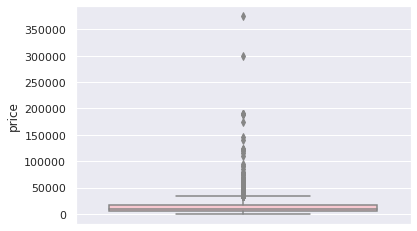

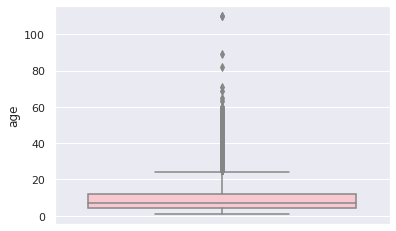

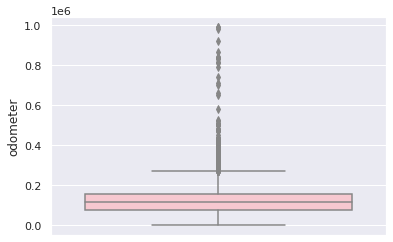

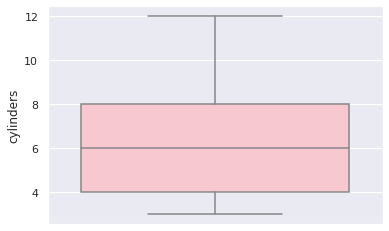

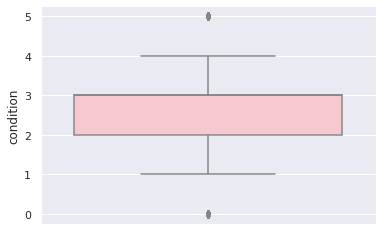

In [52]:
#membuat boxplot
sns.set_theme(style="darkgrid")

for column in core_list:
    sns.boxplot(data=vehicle,y=column,color='pink')
    plt.show()


dapat dilihat bahwa kolom `price`, `age`, `odometer` dan `condition` memiliki outliers, kolom `cylinders` sama sekali tidak memiliki outliers, akan tetapi kolom `price`, `age` dan ` odometer` memiliki outliers sangat banyak sehingga diperlukan analisa lebih lanjut terhadap outliers tersebut

### Histogram <a id='histogram'></a>

**Histogram** untuk mengetahui frekuensi data perkategori

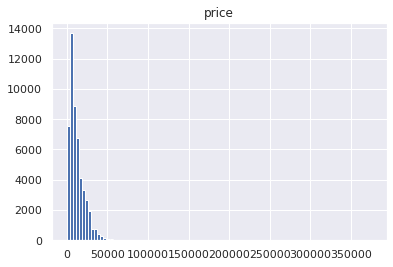

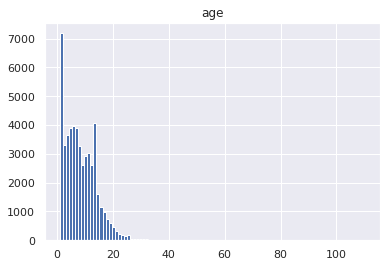

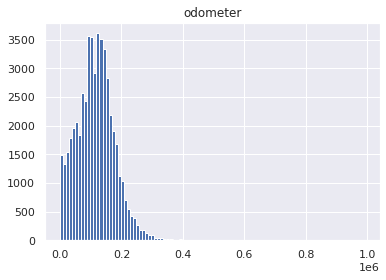

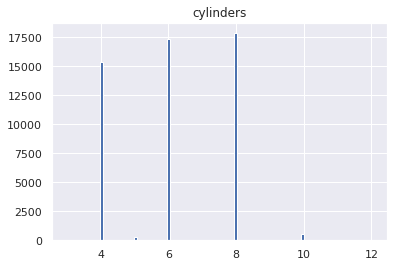

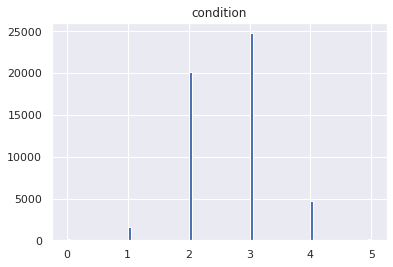

In [53]:
#membuat histogram data
for column in core_list:
    vehicle[[column]].hist(bins=100)
    plt.show()

terlihat bahwa sangat sulit untuk menganalisa data, untuk mempermudah analisa jumlah `bins` akan diubah menyesuaikan dengan data

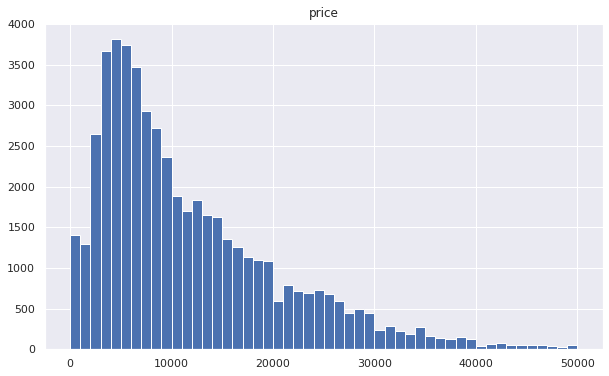

In [54]:
#diagram price
vehicle[['price']].hist(bins=50, range=(0,50000), figsize=(10, 6))
plt.show()

pada kolom harga dapat dilihat bahwa puncak harga terdapat pada rentang `USD 4000` sampai `USD 6000`

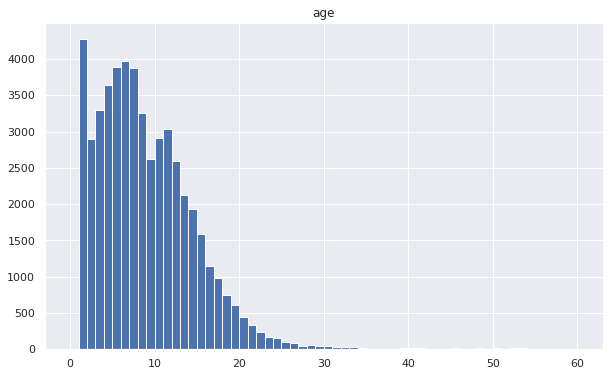

In [55]:
#diagram age
vehicle[['age']].hist(bins=60, range=(0,60), figsize=(10, 6))
plt.show()


puncak penjualan berdasarkan umur adalah pada saat umur kendaraan di bawah 10 tahun lebih tepatnya 2 tahun

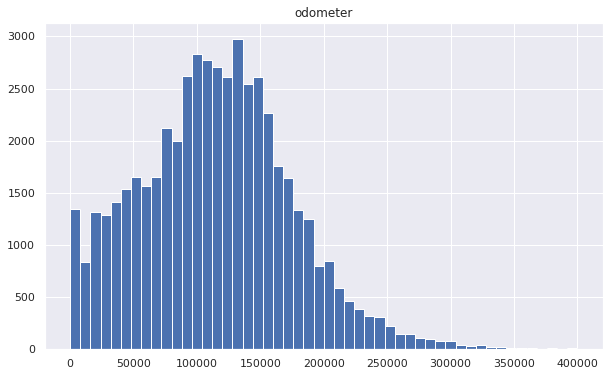

In [56]:
#diagram odometer
vehicle[['odometer']].hist(bins=50, range=(0,400000), figsize=(10, 6))
plt.show()


puncak penjualan mobil adalah pada perhitungan odometer `100000` meter sampai `150000` meter

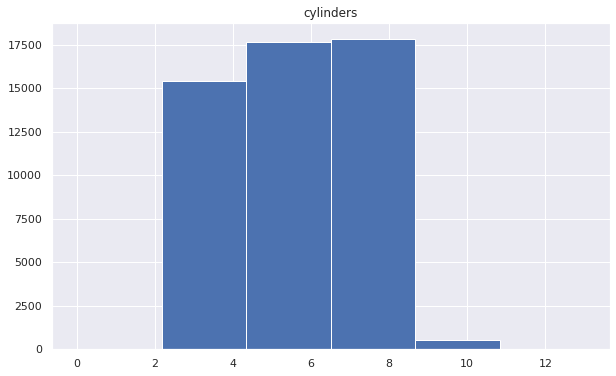

In [57]:
#diagram cylinders
vehicle[['cylinders']].hist(bins=6, range=(0,13), figsize=(10, 6))
plt.show()


kendaraan yang paling banyak terjual adalah kendaraan dengan silinder 6-8

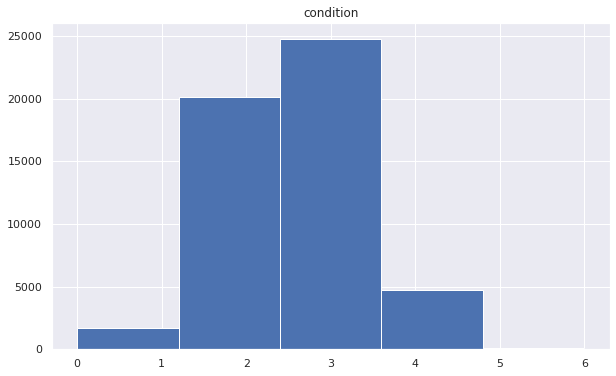

In [58]:
#diagram condition
vehicle[['condition']].hist(bins=5, range=(0,6), figsize=(10, 6))
plt.show()

mobil dengan `condition` bernilai 3 `good` lebih banyak terjual dibandingkan dengan yang lain

**Kesimpulan**
1. terlihat pada kolom `price` memang terdapat banyak outliers dan terjadi penurunan grafik significant setelah harga `50000 USD` dan harga paling umumnya `0 - 10000 USD`
2. pada kolom `age` terdapat variasi umur dan outliers yang cukup banyak, pada histogram dapat dilihat rentang umur paling umumnya adalah `0-20 tahun`
3. kolom `odometer` memiliki outliers, pada histogram dapat lihat bahwa rentang jarak tempuh paling umumnya adalah `0 - 250000 meter`
4. kolom `cylinders` tidak memiliki outliers sehingga tidak ada data yang sangat significant pada kolom.
5. kolom `condition`memiliki sedikit outliers yang sepertinya tidak terlalu mempengaruhi.

### Korelasi data <a id='corr'></a>

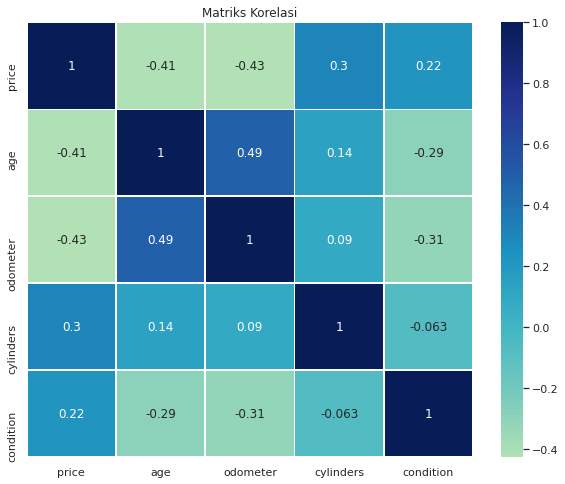

In [59]:
#membuat matriks korelasi

# pengecekan korelasi antar dataset secara numerik
corr = vehicle[core_list].corr()

# Membuat plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', center=0,  linewidths = 0.75, linecolor = "white")
plt.title('Matriks Korelasi')
plt.show()

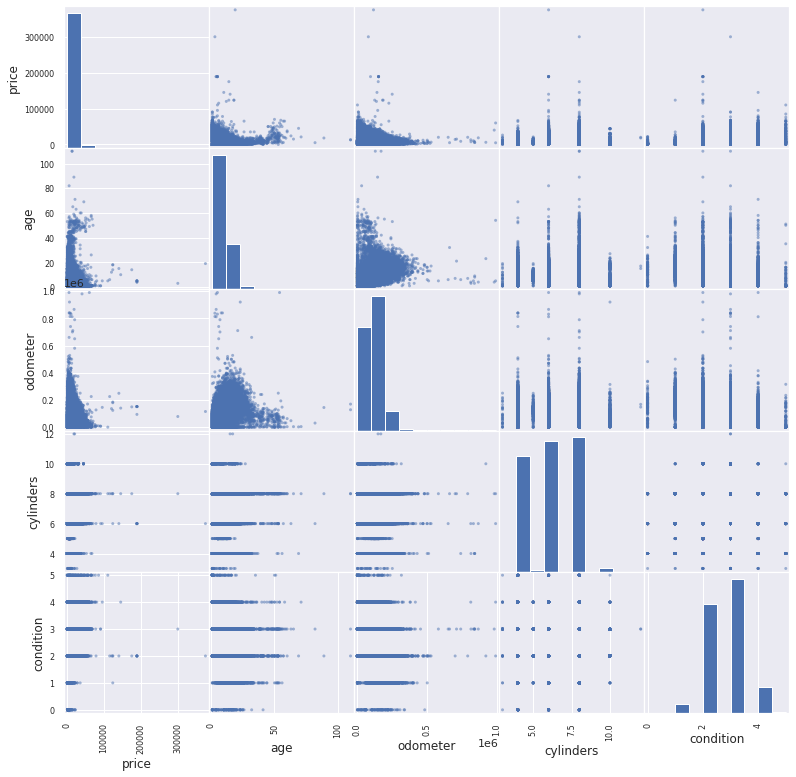

In [60]:
# pengecekan korelasi antar dataset secara grafik
pd.plotting.scatter_matrix(vehicle[core_list],figsize=(13,13))
plt.show()

**Kesimpulan**
1. dapat dilihat bahwa harga `price` memiliki korelasi positif dengan kolom silinder `cylinders` dan kolom kondisi `condition` kemungkinan dikarenakan semakin banyak jumlah silinder yang dimiliki maka semakin tinggi harga, dan semakin baik kondisi dari suatu kendaraan maka harganya akan menjadi semakin tinggi pula.
2. kolom `price` memiliki korelasi negatif terhadap kolom `age` dan `odometer` dikarenakan semakin tua umur kendaraan makan kemungkinan jarak tempuh yang sudah dijalankan menjadi semakin panjang, sehingga kemungkinan ini akan menurunkan kondisi pada kolom `condition` yang akan menyebabkan `price` menjadi turun.

akan tetapi pada scatterplot tidak terlalu terlihat korelasi yang jelas, mungkin ini disebabkan banyaknya outliers pada data



## Mempelajari dan Menangani Outlier<a id='outlier'></a>



dikarenakan banyaknya outliers pada data diperlukan penanganan untuk membantu kita dalam analisa

In [61]:
# Tentukan batas bawah outlier 

# batas bawah outlier kolom 'price'
Q1_price = vehicle['price'].quantile(0.25)
Q3_price = vehicle['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower = Q1_price - 1.5*IQR_price

# batas bawah outlier kolom 'age'
Q1_age = vehicle['age'].quantile(0.25)
Q3_age = vehicle['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_lower = Q1_age - 1.5*IQR_age

# batas bawah outlier kolom 'odometer'
Q1_odometer = vehicle['odometer'].quantile(0.25)
Q3_odometer = vehicle['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
odometer_lower = Q1_odometer - 1.5*IQR_odometer

In [62]:
# Tentukan batas atas outlier 

#batas atas outlier kolom 'price'
price_upper = Q3_price + 1.5*IQR_price

#batas atas outlier kolom 'age'
age_upper = Q3_age + 1.5*IQR_age

#batas atas outlier kolom 'odometer'
odometer_upper = Q3_odometer + 1.5*IQR_odometer

In [63]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
# membersihkan outlier kolom 'price'
clean_vehicle_data = vehicle.query('price >= @price_lower and price <= @price_upper')

# membersihkan outlier kolom 'usia'
clean_vehicle_data = clean_vehicle_data.query('age >= @age_lower and age <= @age_upper')

# membersihkan outlier kolom 'odometer'
clean_vehicle_data = clean_vehicle_data.query('odometer >= @odometer_lower and odometer <= @odometer_upper')

# informasi dataframe terbaru setelah cleanup
clean_vehicle_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48550 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         48550 non-null  int64         
 1   model_year    48550 non-null  int64         
 2   model         48550 non-null  object        
 3   condition     48550 non-null  int64         
 4   cylinders     48550 non-null  int64         
 5   fuel          48550 non-null  object        
 6   odometer      48550 non-null  float64       
 7   transmission  48550 non-null  object        
 8   type          48550 non-null  object        
 9   paint_color   48550 non-null  object        
 10  is_4wd        48550 non-null  boolean       
 11  date_posted   48550 non-null  datetime64[ns]
 12  days_listed   48550 non-null  int64         
 13  day           48550 non-null  int64         
 14  date          48550 non-null  int64         
 15  month         48550 non-null  int64 

sekarang jumlah data yang kita miliki berkurang menjadi `48550` data

## Mempelajari Parameter Inti Tanpa Outlier <a id='corenooutlier'></a>

### Kolom `price` <a id='price'></a>

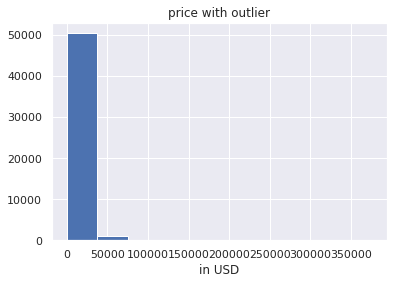

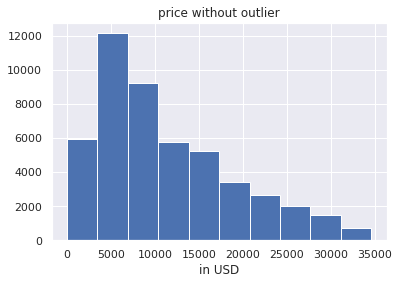

In [64]:
#histogram price dengan outlier
vehicle[['price']].hist(bins=10)
plt.title('price with outlier')
plt.xlabel('in USD')

#histogram price tanpa outlier
clean_vehicle_data[['price']].hist(bins=10)
plt.title('price without outlier')
plt.xlabel('in USD')

plt.show()

dalam dilihat bahwa data setelah dilakukan pembersihan outliers mmemiliki rentang dari `0-35000 USD` dibandingkan data sebelumnya yang memiliki rentang sangat besar

### Kolom `age` <a id='agenoout'></a>

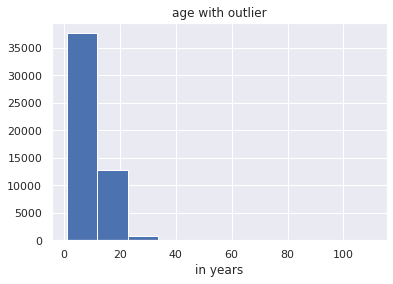

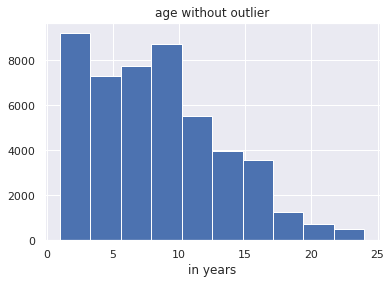

In [65]:
#histogram age dengan outlier
vehicle[['age']].hist(bins=10)
plt.title('age with outlier')
plt.xlabel('in years')

#histogram age tanpa outlier
clean_vehicle_data[['age']].hist(bins=10)
plt.title('age without outlier')
plt.xlabel('in years')

plt.show()

dapat dilihat bahwa data sebelumnya bisa memiliki umur `100 tahun` tapi sekarang kita memiliki data bersih hanya memiliki rentang sampai `25 tahun`

### Kolom `odometer`<a id='odo'></a>

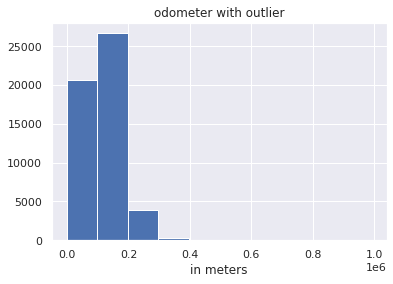

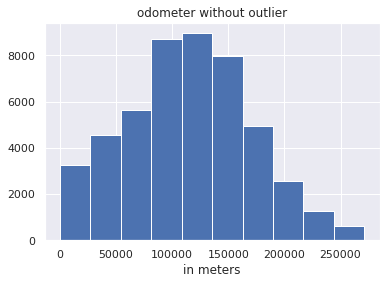

In [66]:
#histogram odometer dengan outlier
vehicle[['odometer']].hist(bins=10)
plt.title('odometer with outlier')
plt.xlabel('in meters')

#histogram odometer tanpa outlier
clean_vehicle_data[['odometer']].hist(bins=10)
plt.title('odometer without outlier')
plt.xlabel('in meters')

plt.show()

dapat dilihat bahwa rentang data berkurang sangat drastis dari lebih dari `1000000` meter  menjadi `250000` meter

sekarang kita bisa melihat korelasinya

### Korelasi data tanpa outliers<a id='corenooutlier'></a>

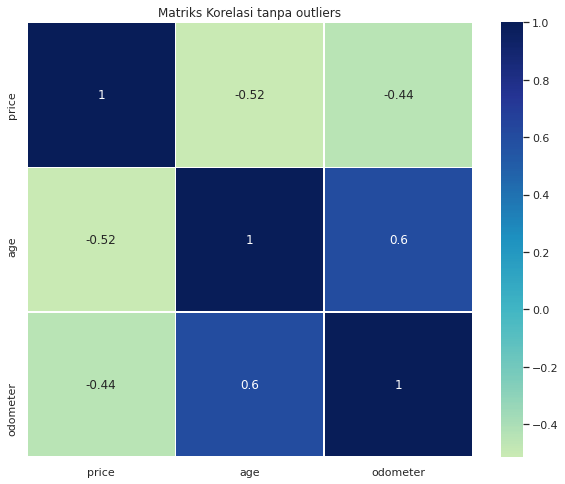

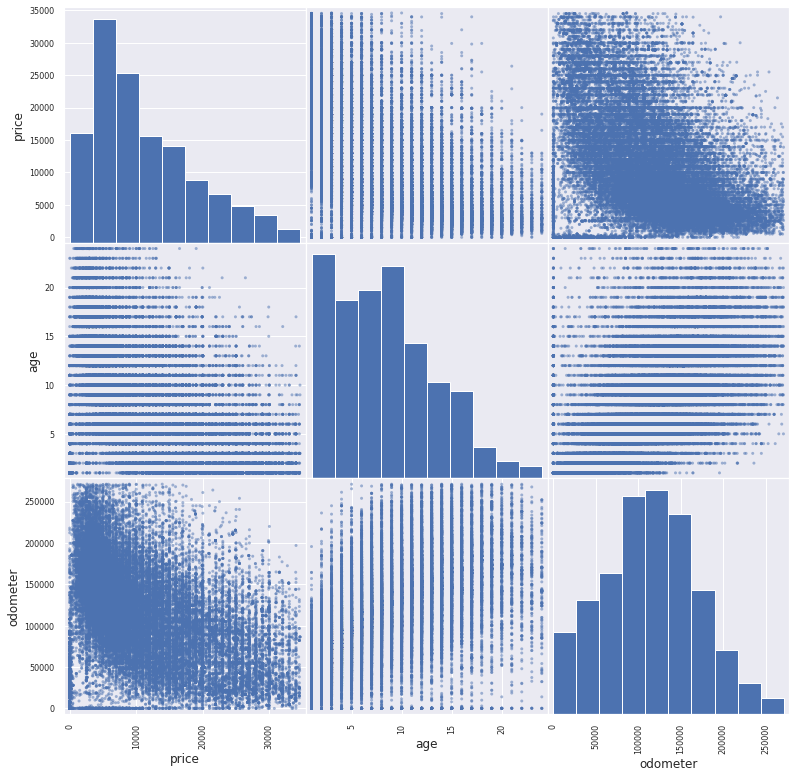

In [67]:
#membuat matriks korelasi
core_list_cleaned = ['price', 'age', 'odometer']
# pengecekan korelasi antar dataset secara numerik
corr2 = clean_vehicle_data[core_list_cleaned].corr()

# Membuat plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='YlGnBu', center=0,  linewidths = 0.75, linecolor = "white")
plt.title('Matriks Korelasi tanpa outliers')

# pengecekan korelasi antar dataset secara grafik
pd.plotting.scatter_matrix(clean_vehicle_data[core_list_cleaned],figsize=(13,13))

plt.show()

sekarang dapat dilihat lebih jelas pengaruh korelasi terhadap variabel lainnya:
1. kolom `price` memiliki korelasi negatif terhadap kolom `odometer` dan `age`
2. kolom `age` memiliki korelasi positif terhadap kolom `odometer` dan korelasi negatif terhadap `price`

**Kesimpulan**
1. kolom `price` tanpa outliers mengalami pengurangan range data yang sangat significat yaitu pada `0-35000 USD` dan terlihat lebih jelas frekuensi harga yang paling banyak diiklankan .
2. kolom `age` sekarang memiliki rentang sampai `25 tahun` dan terlihat bahwa kendaraan yang cukup sering diikanlan terletak pada rentang umur tersebut.
3. kolom `odometer` memiliki outliers yang sangat jauh sehingga sekarang hanya memiliki rentang `250000 meter`.
4. `price` berhubungan secara korelasi negatif dengan `age` dan `odometer`

## Menguji data <a id='datatest'></a>

### Masa Berlaku Iklan <a id='adv'></a>
Pelajari berapa hari iklan ditayangkan (`days_listed`). 
Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat dan kapan iklan ditayangkan dalam waktu yang sangat lama

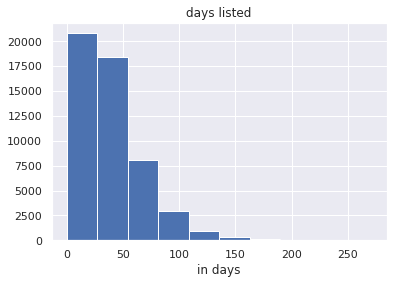

In [68]:
#histogram days_listed
vehicle[['days_listed']].hist(bins=10)
plt.title('days listed')
plt.xlabel('in days')
plt.show()

dapat dilihat bahwa kemungkinan ada beberapa iklan yang terlalu cepat dan terlalu lambat dihapus

In [69]:
# menghitung mean dan median dari 'days_listed'
print(f"Rata-rata 'days_listed'\t: {clean_vehicle_data['days_listed'].mean():.1f}")
print(f"Median 'days_listed'\t: {clean_vehicle_data['days_listed'].median()}")

Rata-rata 'days_listed'	: 39.5
Median 'days_listed'	: 33.0


dapat dilihat bahwa `median` memiliki nilai `33 hari` sedangkan `mean` memiliki nilai `39 hari` ini kemungkinan dipengaruhi oleh iklan yang terlalu lama ditayangkan sehingga rata-rata menjadi meningkat, untuk menghindari pengaruh ini akan dipilih analisa menggunakan `median`

In [70]:
clean_vehicle_data['days_listed'].describe()

count    48550.000000
mean        39.540577
std         28.212085
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [71]:
# menghitung quartil pertama dan quartil ketiga untuk days_listed
Q1_days = clean_vehicle_data['days_listed'].quantile(0.25)
Q3_days = clean_vehicle_data['days_listed'].quantile(0.75)

# mencari waktu ditayangkan sangat singkat
clean_vehicle_data['too_fast'] = clean_vehicle_data['days_listed'] <= Q1_days
too_fast = clean_vehicle_data[clean_vehicle_data['too_fast'] == 1]
too_fast_stat = too_fast[['date_posted','days_listed','too_fast']]

too_fast_stat.sort_values('days_listed')

,date_posted,days_listed,too_fast
38822,2018-06-12,0,True
16046,2018-05-31,0,True
29377,2018-08-27,0,True
31268,2018-12-31,0,True
23195,2019-03-09,0,True
...,...,...,...
38406,2019-02-20,19,True
38345,2018-09-08,19,True
38322,2019-03-10,19,True
38288,2019-01-12,19,True


In [72]:
persent_too_fast = len(too_fast_stat) / len(clean_vehicle_data) * 100
persent_too_fast

26.210092687950564

dapat dilihat bahwa sebanyak `12725` data memiliki waktu penanyangan iklan yang singkat yaitu `0-19 hari`, dan memiliki data sebanyak `26%` dari data yang sudah tidak memiliki outliers `clean_vehicle_data`

In [73]:
# mencari waktu ditayangkan sangat singkat
clean_vehicle_data['too_slow'] = clean_vehicle_data['days_listed'] >= Q3_days
too_slow = clean_vehicle_data[clean_vehicle_data['too_slow'] == 1]
too_slow_stat = too_slow[['date_posted','days_listed','too_slow']]

too_slow_stat.sort_values('days_listed')

,date_posted,days_listed,too_slow
13052,2019-04-10,53,True
9914,2019-01-15,53,True
27481,2018-10-09,53,True
4672,2018-12-22,53,True
2456,2018-12-26,53,True
...,...,...,...
7875,2019-02-02,256,True
51,2018-11-29,261,True
2224,2019-01-24,263,True
28756,2019-01-08,267,True


In [74]:
persent_too_slow = len(too_slow_stat) / len(clean_vehicle_data) * 100
persent_too_slow

25.728115345005147

dapat dilihat bahwa sebanyak `12491` data memiliki waktu penanyangan iklan yang singkat yaitu `53-271 hari` dan memiliki data hampir sebanyak `26%` dari data yang sudah tidak memiliki outliers `clean_vehicle_data`

**Kesimpulan Sementara**

- Rata-rata 'days_listed'	: 39.5 hari
- Median 'days_listed'	: 33.0 hari
- penayangan iklan yang terlalu cepat `too_fast` berkisar pada `0-19` hari dan memiliki sekitar `26%` dari jumlah data
- penayangan iklan yang terlalu lambat `too_slow` berkisar pada `53-271` hari dan memiliki sekitar `26%` dari jumlah data

_**Hyphotheses 1**_

Dari kesimpulan dapat dijawab hyphoteses pertama kita: Apakah iklan mobil yang ditayangkan paling lama ditayangkan pada 30 hari?

terlihat bahwa iklan dapat diiklankan paling lama selama `271 hari` sebelum dihapus

### Harga Rata-Rata Setiap Jenis Kendaraan <a id='pricemean'></a>

Analisis pada jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buat sebuah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak dan dua jenis kendaraan dengan harga rata-rata tertinggi

In [75]:
price_type_pivot = clean_vehicle_data.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
price_type_pivot.columns = ['Jumlah iklan', 'Harga']
price_type_pivot.sort_values('Jumlah iklan', ascending=False)

,Jumlah iklan,Harga
type,,
sedan,12036,6969.770106
SUV,11944,10432.273861
truck,11162,15096.510482
pickup,6337,14994.104150
coupe,2031,13464.256032
wagon,1506,8975.517928
mini-van,1147,8046.564080
hatchback,1007,6838.923535
van,584,8820.914384


terlihat bahwa jenis mobil mempengaruhi harga jual rata-rata tiap kendaraan, mobil dengan kapasitas kecil cenderung memiliki harga lebih rendah daripada mobil dengan kapasitas besar, mobil yang digunakan untuk keperluan keluarga cenderung memiliki jumlah iklan yang lebih banyak.

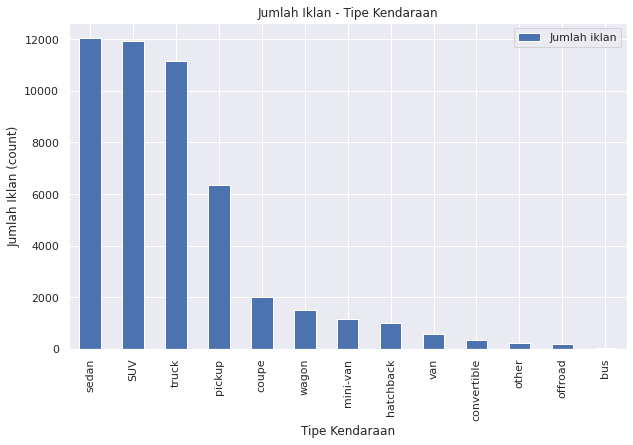

In [76]:
#membuat chart jumlah iklan
price_type_pivot.sort_values('Jumlah iklan', ascending=False).plot(
        kind='bar',
        y='Jumlah iklan', 
        figsize=(10,6))
    
# membuat label dan judul
plt.title('Jumlah Iklan - Tipe Kendaraan')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Jumlah Iklan (count)')

# menampilkan grafik
plt.show()

dapat dilihat bahwa mobil berjenis `sedan` dan `SUV` memiliki jumlah iklan paling banyak diantara yang lainnya. sehingga mobil `sedan` dan `SUV` akan dipilih untuk analisa lebih mendalam

_**Hyphotheses 2 & Hyphotheses 3**_

Dari kesimpulan dapat dijawab hyphoteses kedua dan ketiga kita: 

2. Apakah tipe kendaraan mempengaruhi jumlah promosi iklan?
3. Apakah mobil keluarga cenderung sering diiklankan?

terlihat bahwa tipe kendaraan jelas mempengaruhi jumlah iklan dan mobil berjenis `sedan` dan `suv` adalah yang paling banyak diiklankan dan termasuk ke dalam mobil berjenis mobil keluarga

In [77]:
price_type_pivot.sort_values('Harga', ascending=False)

,Jumlah iklan,Harga
type,,
bus,23,17445.913043
truck,11162,15096.510482
pickup,6337,14994.104150
offroad,183,14292.989071
coupe,2031,13464.256032
convertible,353,12848.541076
other,237,10482.776371
SUV,11944,10432.273861
wagon,1506,8975.517928


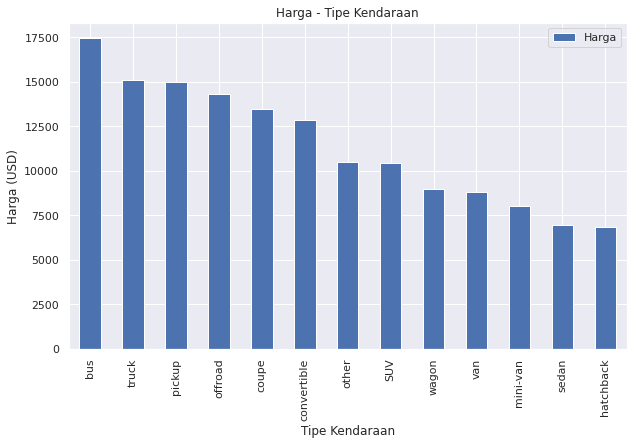

In [78]:
#membuat chart jumlah iklan
price_type_pivot.sort_values('Harga', ascending=False).plot(
        kind='bar',
        y='Harga', 
        figsize=(10,6))
    
# membuat label dan judul
plt.title('Harga - Tipe Kendaraan')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Harga (USD)')

# menampilkan grafik
plt.show()

dapat dilihat bahwa harga tertinggi adalah mobil dengan jenis mobil fungsional diantaranya `bus`, `truck` dan `pickup` tetapi karena jumlah iklan `bus` sangat sedikit akan dilakukan analisa menggunakan `truck` dan `pickup`

### Faktor Harga<a id='pricefactor'></a>

Apakah faktor yang paling memengaruhi harga kendaraan?
Ambil masing-masing jenis kendaraan populer yang pada tahap sebelumnya `sedan`, `suv`, `truck` dan `pickup` 
apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buat grafik boxplot untuk variabel kategorik (jenis transmisi dan warna), lalu buat scatterplot untuk sisanya. Ketika menganalisis variabel kategorik, ingat bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis

#### Mobil Sedan
mengetahui pengaruh harga `price` mobil sedan terhadap `transmission`, `paint_color`, `age`, `odometer`, dan `condition`.

In [79]:
# memfilter data untuk mobil sedan
sedan_data = clean_vehicle_data.query('type == "sedan"')
sedan_data = sedan_data[['price','age','odometer','condition','transmission','paint_color']]


In [80]:
sedan_data['transmission'].value_counts()

automatic    11327
manual         577
other          132
Name: transmission, dtype: int64

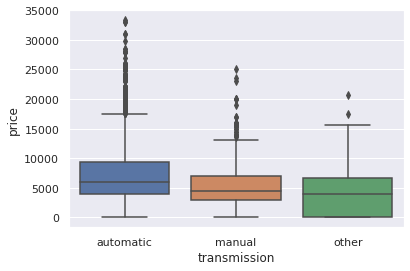

In [81]:
for column in sedan_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_sedan_transmission = pd.DataFrame()
        for unik_t_sedan in sedan_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('transmission == @unik_t_sedan')['transmission'].count() >= 50:
                # memfilter data kategorik
                sedan_transmission = sedan_data.query('transmission == @unik_t_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_transmission = pd.concat([filter_sedan_transmission,sedan_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_sedan_transmission,x=column,y='price')
        plt.show()


dilihat bahwa jenis transmisi yang digunakan mempengaruhi harga jual kendaraan, kendaraan dengan transmisi `automatic` terlihat memiliki harga lebih tinggi dengan jumlah yang diiklankan tinggi pula

In [82]:
sedan_data['paint_color'].value_counts()

Unknown    2167
silver     2037
black      1758
grey       1611
white      1495
blue       1221
red         936
custom      297
brown       257
green       203
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64

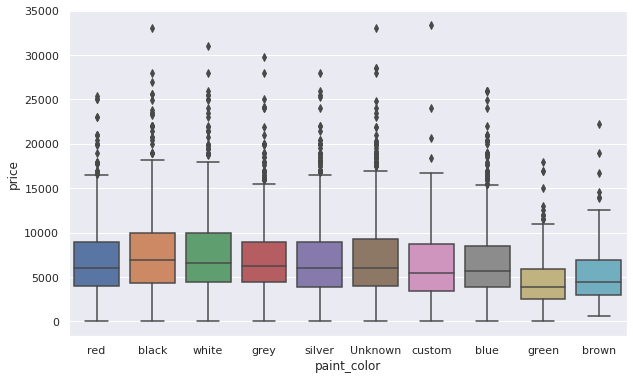

In [83]:
for column in sedan_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_sedan_color = pd.DataFrame()
        for unik_c_sedan in sedan_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('paint_color == @unik_c_sedan')['paint_color'].count() >= 50:
                # memfilter data kategorik
                sedan_color = sedan_data.query('paint_color == @unik_c_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_color = pd.concat([filter_sedan_color,sedan_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_sedan_color,x=column,y='price')
        plt.show()
    


karena sebelumnya kita menginputkan variabel `Unknown` pada kolom ini terlihat bahwa banyak data yang terhitung ke dalam variabel ini. pertama mari kita abaikan variabel ini.

terlihat bahwa warna tidak terlalu berpengaruh terhadap `price` dari mobil sedan akan tetapi memang ada kecenderungan warna tertentu yaitu:
1. `black`, `white` dan `custom` lebih mahal daripada warna lain
2. harga lebih murah seperti `brown` dan `green`

kemungkinan karena mobil sedan adalah mobil untuk keluarga kecenderungan seseorang untuk membeli warna-warna yang lebih umum lebih besar sehingga warna-warna unik tidak terlalu menarik minat. karena peminat yang banyak dibandingkan dengan produksi jadi harga kendaraan dengan warna-warna tertentu menjadi lebih tinggi.

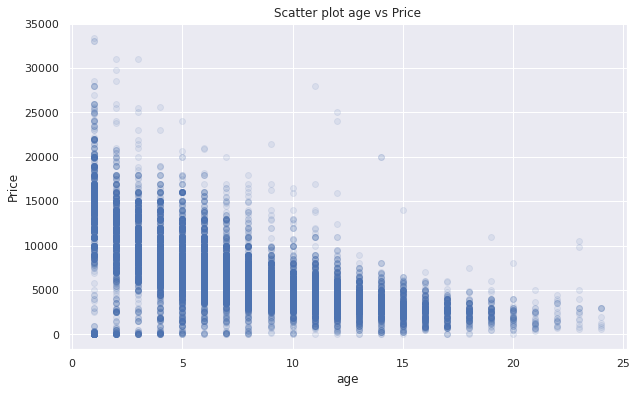

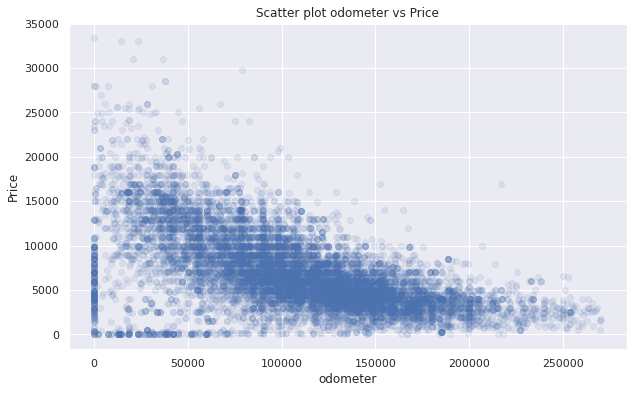

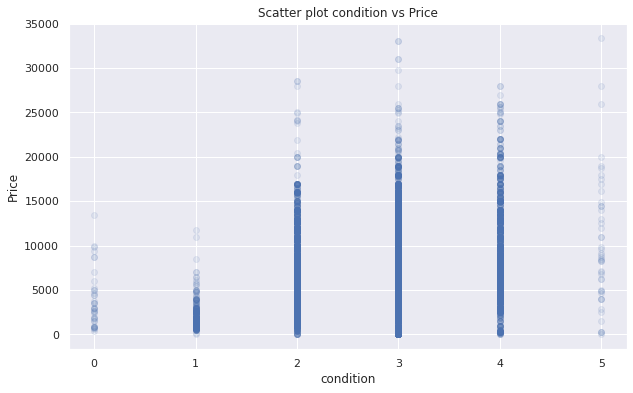

In [84]:
for column in sedan_data.columns:
    if column in ['age', 'odometer', 'condition']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=sedan_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

dari scatterplot pada data mobil sedan dapat diketahui:
1. `price` dan `age` memiliki korelasi linear secara negatif kemungkinan dikarenakan semakin lama umur suatu kendaraan maka akan lebih memungkinkan untuk kendaraan tersebut menjadi lebih murah secara harga
2. `price` dan `odometer` memiliki korelasi linear secara negatif dikarenakan penggunaan dan jarak tempuh yang panjang maka kemungkinan kendaraan tersebut akan lebih murah secara harga
3. `price` dan `condition` tidak memiliki korelasi linear terhadap satu sama lain, akan tetapi memungkinan bahwa variabel ini mempengaruhi harga jual sedan, hanya saja karna jumlah penjualan untuk kondisi `3` yang banyak sehingga variasi harga jualnya menjadi lebih banyak daripada variabel lainnya

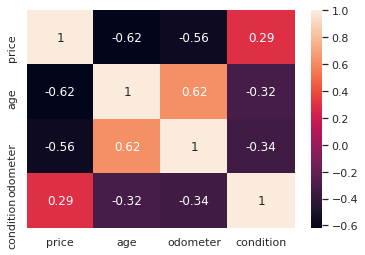

In [85]:
#matriks korelasi
# membuat tabel korelasi harga untuk mobil sedan
corr_sedan = sedan_data[['price','age','odometer','condition']].corr()
sns.heatmap(corr_sedan,annot=True)
plt.show()

dapat dilihat dari matriks korelasi bahwa:
* `price` berkorelasi negatif terhadap `age` dan `odometer` tapi berkorelasi positif dengan `condition`

**Kesimpulan Sementara**
1. `sedan` dengan `transmission` `automatic` memiliki jumlah iklan yang paling banyak dan memiliki harga paling tinggi dibandingkan dengan yang lain
2. `sedan` dengan `paint_color`, `black`, `white` dan `custom` memiliki harga jual lebih tinggi daripada yang lain
3. kolom `age` mempengaruhi harga jual `sedan`, `sedan` dengan usia lebih rendah cenderung memiliki harga jual yang tinggi daripada yang lebih tua
4. kolom `odometer` mempengaruhi harga jual `sedan`, `sedan` dengan jarak tempuh lebih dekat cenderung memiliki harga jual yang tinggi daripada yang telah memiliki jarak tempuh yang jauh
5. kolom `condition` tidak terlalu mempengaruhi harga jual `sedan`, dikarenakan jumlah iklan dengan kondisi 3 paling banyak dan 4 tidak memiliki harga jual yang lebih tinggi daripada 3

#### Mobil SUV
mengetahui pengaruh harga `price` mobil sedan terhadap `transmission`, `paint_color`, `age`, `odometer`, dan `condition`.

In [86]:
# memfilter data untuk mobil suv
suv_data = clean_vehicle_data.query('type == "SUV"')
suv_data = suv_data[['price','age','odometer','condition','transmission','paint_color']]


In [87]:
suv_data['transmission'].value_counts()

automatic    11320
manual         465
other          159
Name: transmission, dtype: int64

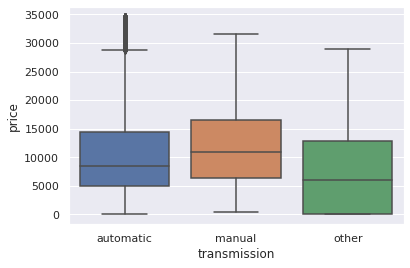

In [88]:
for column in suv_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_suv_transmission = pd.DataFrame()
        for unik_t_suv in suv_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('transmission == @unik_t_suv')['transmission'].count() >= 50:
                # memfilter data kategorik
                suv_transmission = suv_data.query('transmission == @unik_t_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_transmission = pd.concat([filter_suv_transmission,suv_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_suv_transmission,x=column,y='price')
        plt.show()


cukup berbeda dengan sedan mobil `suv` cenderung memiliki harga lebih mahal pada `automatic` mungkin ini dikarenakan lebih banyak peminat mobil `suv` dengan jenis `transmission` `automatic` dibandingkan dengan jenis lain sehingga memiliki harga lebih mahal

In [89]:
suv_data['paint_color'].value_counts()

Unknown    2148
black      2104
white      1876
silver     1535
grey       1148
blue       1014
red         877
green       425
brown       353
custom      299
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64

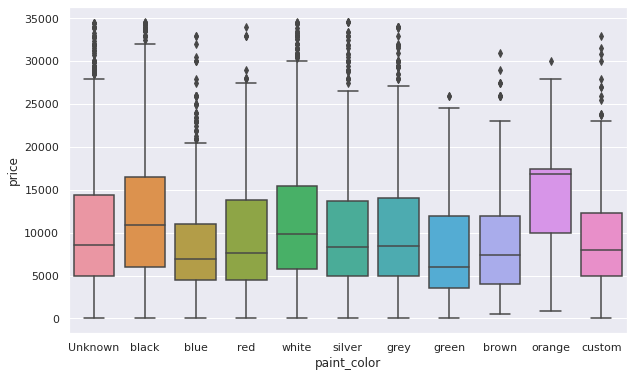

In [90]:
for column in suv_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_suv_color = pd.DataFrame()
        for unik_c_suv in suv_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('paint_color == @unik_c_suv')['paint_color'].count() >= 50:
                # memfilter data kategorik
                suv_color = suv_data.query('paint_color == @unik_c_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_color = pd.concat([filter_suv_color,suv_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_suv_color,x=column,y='price')
        plt.show()
    


pada mobil jenis `suv` memiliki variasi harga yang lebih merata dibandingkan dengan `sedan` dapat dilihat bahwa:
1. mobil dengan warna `black`, `red`, `white`, `silver`, `grey` memiliki harga jual yang tinggi
2. mobil dengan warna `green` cenderung memiliki harga lebih rendah

dilihat pada jumlah iklan warna `black`, `white`, `silver` dan `grey` memiliki jumlah iklan lebih banyak
kemungkinan karna kebutuhan untuk mobil keluarga adalah yang memiliki warna netral jadi kecenderungan untuk j=dijual menjadi lebih banyak sehingga harganyapun menjadi sangat bervariasi

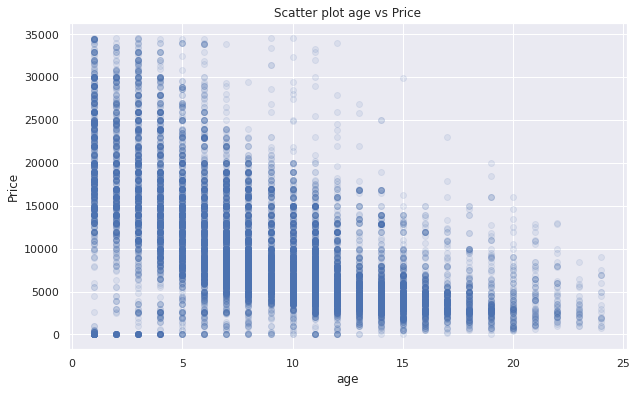

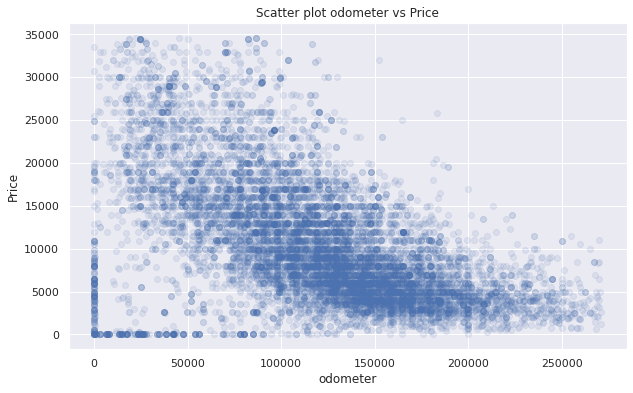

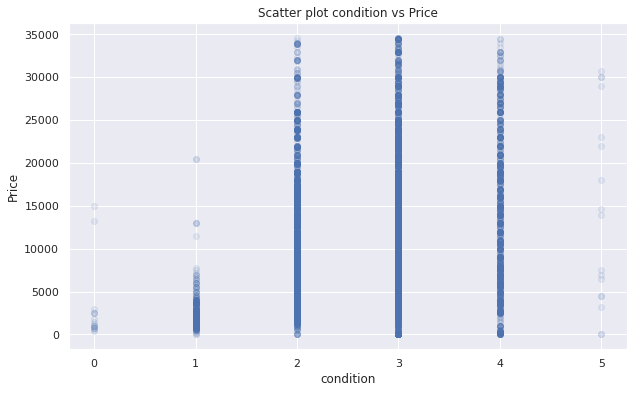

In [91]:
for column in suv_data.columns:
    if column in ['age', 'odometer', 'condition']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=suv_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

dari scatterplot pada data mobil suv dapat diketahui:
1. `price` dan `age` memiliki korelasi linear secara negatif kemungkinan dikarenakan semakin lama umur suatu kendaraan maka akan lebih memungkinkan untuk kendaraan tersebut menjadi lebih murah secara harga
2. `price` dan `odometer` memiliki korelasi linear secara negatif dikarenakan penggunaan dan jarak tempuh yang panjang maka kemungkinan kendaraan tersebut akan lebih murah secara harga
3. `price` dan `condition` tidak memiliki korelasi linear terhadap satu sama lain, akan tetapi memungkinan bahwa variabel ini mempengaruhi harga jual suv, hanya saja karna jumlah penjualan untuk kondisi `3` yang banyak sehingga variasi harga jualnya menjadi lebih banyak daripada variabel lainnya

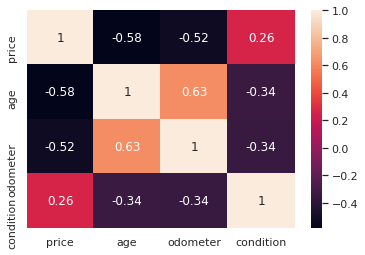

In [92]:
#Matriks korelasi
# membuat tabel korelasi harga untuk mobil suv
corr_suv = suv_data[['price','age','odometer','condition']].corr()
sns.heatmap(corr_suv,annot=True)
plt.show()

dapat dilihat dari matriks korelasi bahwa:
* `price` berkorelasi negatif terhadap `age` dan `odometer` tapi berkorelasi positif dengan `condition`

**Kesimpulan Sementara**
1. `suv` dengan `transmission` `automatic` memiliki jumlah iklan yang paling banyak dan memiliki harga paling tinggi dibandingkan dengan yang lain
2. `suv` dengan `paint_color`, `black`,`red`, `white`, `silver` dan `grey` memiliki harga jual lebih tinggi daripada yang lain
3. kolom `age` mempengaruhi harga jual `suv`, `suv` dengan usia lebih rendah cenderung memiliki harga jual yang tinggi daripada yang lebih tua
4. kolom `odometer` mempengaruhi harga jual `suv`, `suv` dengan jarak tempuh lebih dekat cenderung memiliki harga jual yang tinggi daripada yang telah memiliki jarak tempuh yang jauh
5. kolom `condition` tidak terlalu mempengaruhi harga jual `suv`, dikarenakan jumlah pengiklanan dengan kondisi 3 paling banyak dan 4 tidak memiliki harga jual yang lebih tinggi daripada 3

#### Mobil Pickup
mengetahui pengaruh harga `price` mobil pickup terhadap `transmission`, `paint_color`, `age`, `odometer`, dan `condition`.

In [93]:
# memfilter data untuk mobil pickup
pickup_data = clean_vehicle_data.query('type == "pickup"')
pickup_data = pickup_data[['price','age','odometer','condition','transmission','paint_color']]


In [94]:
pickup_data['transmission'].value_counts()

automatic    5430
other         616
manual        291
Name: transmission, dtype: int64

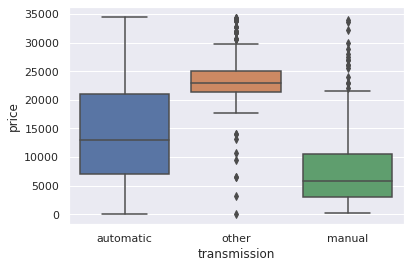

In [95]:
for column in pickup_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_pickup_transmission = pd.DataFrame()
        for unik_t_pickup in pickup_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if pickup_data.query('transmission == @unik_t_pickup')['transmission'].count() >= 50:
                # memfilter data kategorik
                pickup_transmission = pickup_data.query('transmission == @unik_t_pickup')
                # menggabungkan data ke dataframe tampungan
                filter_pickup_transmission = pd.concat([filter_pickup_transmission,pickup_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_pickup_transmission,x=column,y='price')
        plt.show()


dilihat bahwa jenis transmisi yang digunakan mempengaruhi harga jual kendaraan, kendaraan dengan transmisi `automatic` terlihat memiliki harga lebih tinggi dengan jumlah yang diiklankan tinggi pula

In [96]:
pickup_data['paint_color'].value_counts()

white      1643
Unknown    1206
black       859
silver      634
red         590
grey        513
blue        464
green       184
brown       160
custom       38
orange       24
yellow       14
purple        8
Name: paint_color, dtype: int64

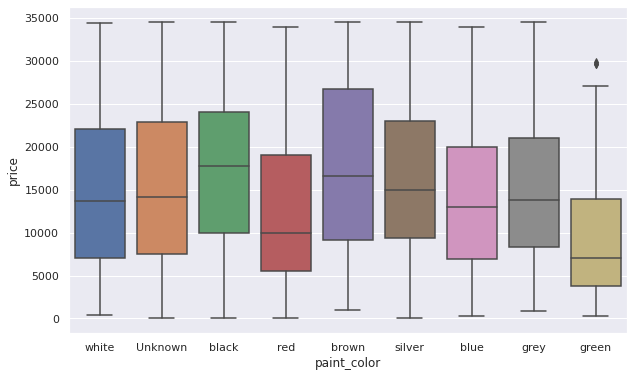

In [97]:
for column in pickup_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_pickup_color = pd.DataFrame()
        for unik_c_pickup in pickup_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if pickup_data.query('paint_color == @unik_c_pickup')['paint_color'].count() >= 50:
                # memfilter data kategorik
                pickup_color = pickup_data.query('paint_color == @unik_c_pickup')
                # menggabungkan data ke dataframe tampungan
                filter_pickup_color = pd.concat([filter_pickup_color,pickup_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_pickup_color,x=column,y='price')
        plt.show()
    


terlihat bahwa warna tidak terlalu berpengaruh terhadap `price` dari mobil truck akan tetapi jumlah iklan untuk warna seperti `black`, `white` dan `silver` memiliki jumlah iklan yang sangat banyak dibandingkan yang lain.

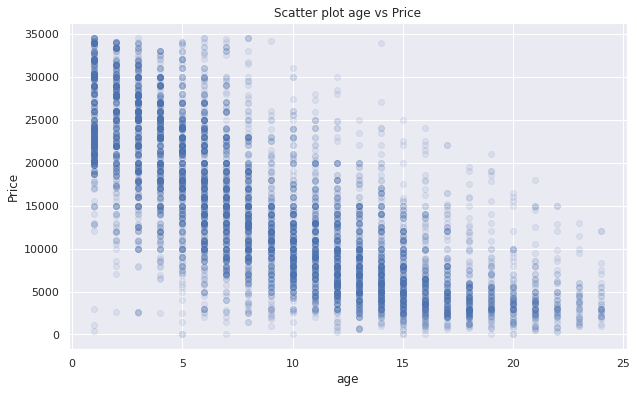

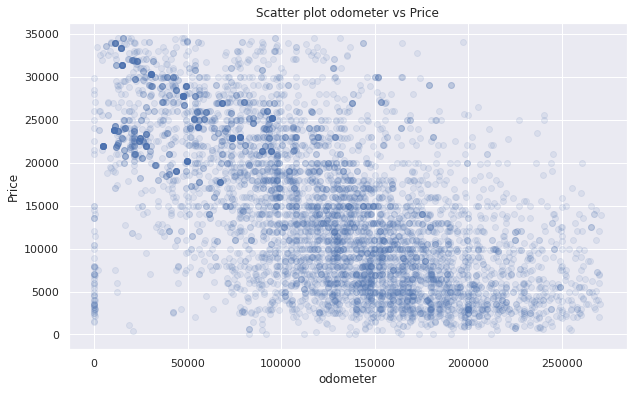

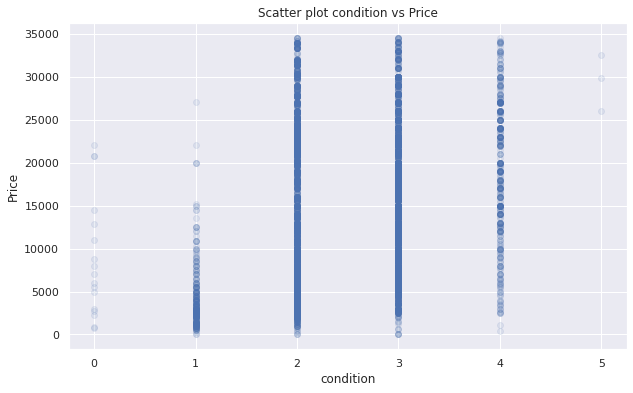

In [98]:
for column in pickup_data.columns:
    if column in ['age', 'odometer', 'condition']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=pickup_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

dari scatterplot pada data mobil pickup dapat diketahui:
1. `price` dan `age` memiliki korelasi linear secara negatif
2. `price` dan `odometer` memiliki korelasi linear secara negatif 
3. `price` dan `condition` tidak memiliki korelasi linear terhadap satu sama lain, akan tetapi memungkinan bahwa variabel ini mempengaruhi harga jual sedan, hanya saja karna jumlah penjualan untuk kondisi `3` dan `2` yang banyak sehingga variasi harga jualnya menjadi lebih banyak daripada variabel lainnya

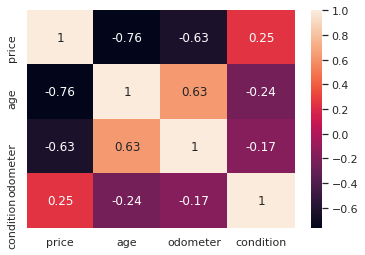

In [99]:
#matriks korelasi
# membuat tabel korelasi harga untuk mobil sedan
corr_pickup = pickup_data[['price','age','odometer','condition']].corr()
sns.heatmap(corr_pickup,annot=True)
plt.show()

dapat dilihat dari matriks korelasi bahwa:
* `price` berkorelasi negatif terhadap `age` dan `odometer` tapi berkorelasi positif dengan `condition`

**Kesimpulan Sementara**
1. `pickup` dengan `transmission` `automatic` memiliki jumlah iklan yang paling banyak dan memiliki harga paling tinggi dibandingkan dengan yang lain
2. `pickup` dengan `paint_color`, `black` dan `white`memiliki jumlah iklan yang banyak tetapi harganya hampir sama saja dengan warna lainnya
3. kolom `age` mempengaruhi harga jual `pickup`, `pickup` dengan usia lebih rendah cenderung memiliki harga jual yang tinggi daripada yang lebih tua
4. kolom `odometer` mempengaruhi harga jual `pickup`, `pickup` dengan jarak tempuh lebih dekat cenderung memiliki harga jual yang tinggi daripada yang telah memiliki jarak tempuh yang jauh
5. kolom `condition` tidak terlalu mempengaruhi harga jual `pickup`, dikarenakan jumlah iklan dengan kondisi 2 dan 3 yang banyak

#### Mobil Truck
mengetahui pengaruh harga `price` mobil truck terhadap `transmission`, `paint_color`, `age`, `odometer`, dan `condition`.

In [100]:
# memfilter data untuk mobil truck
truck_data = clean_vehicle_data.query('type == "truck"')
truck_data = truck_data[['price','age','odometer','condition','transmission','paint_color']]


In [101]:
truck_data['transmission'].value_counts()

automatic    10593
manual         378
other          191
Name: transmission, dtype: int64

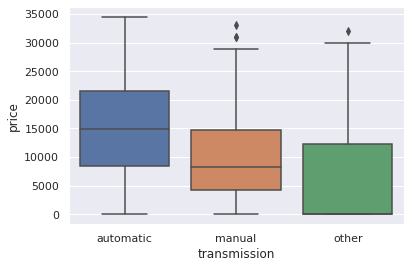

In [102]:
for column in truck_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_truck_transmission = pd.DataFrame()
        for unik_t_truck in truck_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if truck_data.query('transmission == @unik_t_truck')['transmission'].count() >= 50:
                # memfilter data kategorik
                truck_transmission = truck_data.query('transmission == @unik_t_truck')
                # menggabungkan data ke dataframe tampungan
                filter_truck_transmission = pd.concat([filter_truck_transmission,truck_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_truck_transmission,x=column,y='price')
        plt.show()


dilihat bahwa jenis transmisi yang digunakan mempengaruhi harga jual kendaraan, kendaraan dengan transmisi `automatic` terlihat memiliki harga lebih tinggi dengan jumlah yang diiklankan tinggi pula

In [103]:
truck_data['paint_color'].value_counts()

white      3361
Unknown    1932
black      1400
red         954
silver      934
grey        849
blue        824
custom      299
green       258
brown       228
yellow       65
orange       45
purple       13
Name: paint_color, dtype: int64

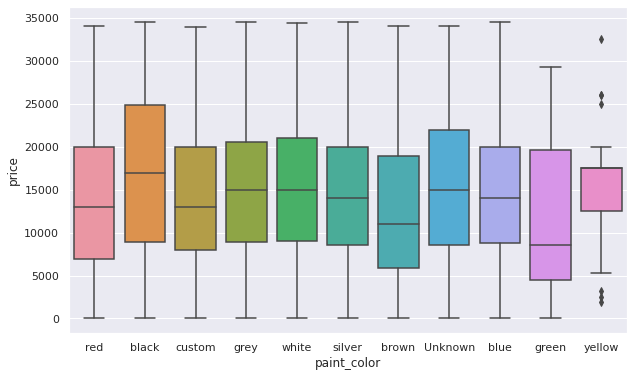

In [104]:
for column in truck_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_truck_color = pd.DataFrame()
        for unik_c_truck in truck_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if truck_data.query('paint_color == @unik_c_truck')['paint_color'].count() >= 50:
                # memfilter data kategorik
                truck_color = truck_data.query('paint_color == @unik_c_truck')
                # menggabungkan data ke dataframe tampungan
                filter_truck_color = pd.concat([filter_truck_color,truck_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_truck_color,x=column,y='price')
        plt.show()
    


terlihat bahwa warna tidak terlalu berpengaruh terhadap `price` dari mobil truck akan tetapi jumlah iklan untuk warna seperti `black`, `white` dan `silver` memiliki jumlah iklan yang sangat banyak dibandingkan yang lain.

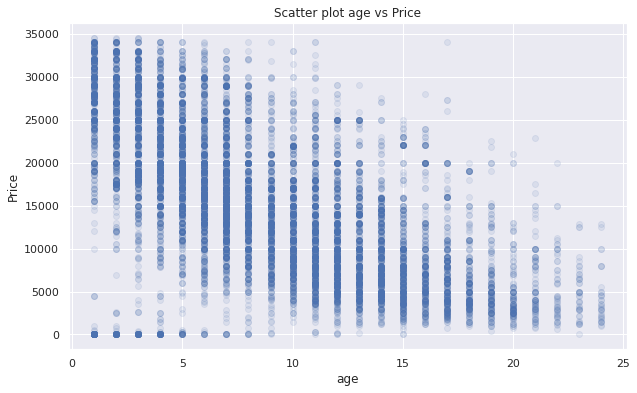

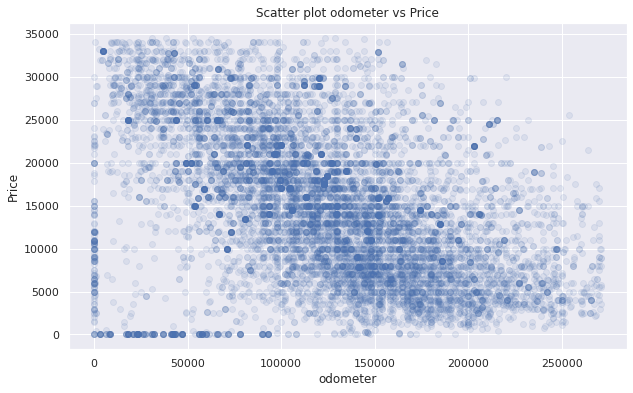

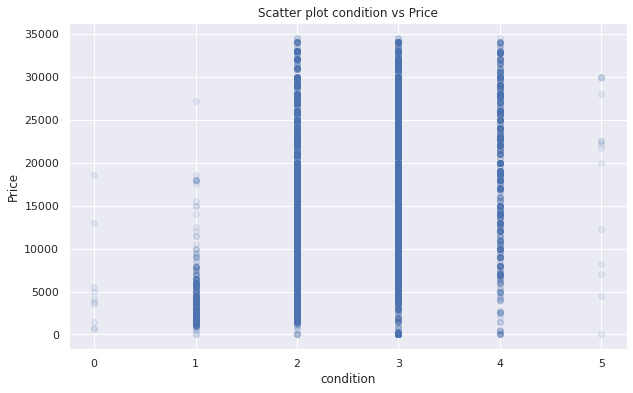

In [105]:
for column in truck_data.columns:
    if column in ['age', 'odometer', 'condition']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=truck_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

dari scatterplot pada data mobil truck dapat diketahui:
1. `price` dan `age` memiliki korelasi linear secara negatif
2. `price` dan `odometer` memiliki korelasi linear secara negatif 
3. `price` dan `condition` tidak memiliki korelasi linear terhadap satu sama lain, akan tetapi memungkinan bahwa variabel ini mempengaruhi harga jual sedan, hanya saja karna jumlah penjualan untuk kondisi `3`, `2`, dan `4` yang banyak sehingga variasi harga jualnya menjadi lebih banyak daripada variabel lainnya

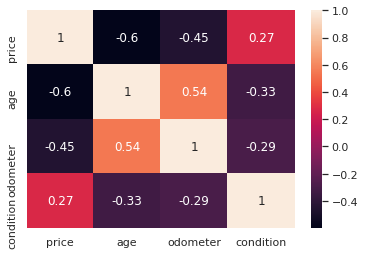

In [106]:
#matriks korelasi
# membuat tabel korelasi harga untuk mobil sedan
corr_truck = truck_data[['price','age','odometer','condition']].corr()
sns.heatmap(corr_truck,annot=True)
plt.show()

dapat dilihat dari matriks korelasi bahwa:
* `price` berkorelasi negatif terhadap `age` dan `odometer` tapi berkorelasi positif dengan `condition`

**Kesimpulan Sementara**
1. `truck` dengan `transmission` `automatic` memiliki jumlah iklan yang paling banyak dan memiliki harga paling tinggi dibandingkan dengan yang lain
2. `truck` dengan `paint_color`, `black` dan `white`memiliki jumlah iklan yang banyak tetapi harganya hampir sama saja dengan warna lainnya
3. kolom `age` mempengaruhi harga jual `truck`, `truck` dengan usia lebih rendah cenderung memiliki harga jual yang tinggi daripada yang lebih tua
4. kolom `odometer` mempengaruhi harga jual `truck`, `truck` dengan jarak tempuh lebih dekat cenderung memiliki harga jual yang tinggi daripada yang telah memiliki jarak tempuh yang jauh
5. kolom `condition` tidak terlalu mempengaruhi harga jual `truck`, dikarenakan jumlah iklan dengan kondisi 2, 3 dan 4 yang banyak, tertutama kondisi 3

**Kesimpulan**
- mobil `truck`, `pickup`, `suv` dan `sedan` dengan transmisi `automatic` memiliki harga jual dan jumlah iklan yang lebih tinggi daripada yang transmisi yang lain
- mobil `suv` dan `sedan` dengan warna `paint_color` dengan warna-warna umum seperti `black` dan `white` memiliki harga jual yang lebih tinggi daripada warna yang lain
- mobil `truck` dan `pickup` dengan `paint_color` `black` dan `white` memiliki jumlah iklan yang banyak tetapi tidak mempengaruhi harga jualnya
- harga jual mobil `truck`, `pickup`, `suv` dan `sedan` dipengaruhi oleh usia `age` dan `odometer` kendaraannya
- harga jual mobil `truck`, `pickup`, `suv` dan `sedan` terlalu dipengaruhi oleh `condition` kendaraannya tapi jumlah penjualan dengan variabel 3 cenderung lebih banyak diiklankan dibandingkan dengan kondisi lain

_**Hyphotheses 4 & Hyphotheses 5**_

Dari kesimpulan dapat dijawab hyphoteses keempat dan kelima kita: 

4. Apakah kondisi dan usia kendaraan mempengaruhi harga jual kendaraan?
   1. terlihat bahwa usia dan kondisi kendaraan mempengaruhi harga jual kendaraan, akan tetapi kendaraan dengan kondisi baik cenderung lebih laku dipasaran daripada kendaraan baru yang diiklankan.

5. Apakah mobil dengan warna putih cenderung mempengaruhi jumlah iklan yang ditayangkan?
    1. pada mobil `truck`, `pickup`, `sedan` dan `suv` warna putih terus menjadi 5 besar yang paling banyak diiklankan dibandingkan warna lain dan menjadi 2 warna dengan harga yang cukup mahal dalam penjualan pada `sedan` dan `suv`.

## Kesimpulan Umum<a id='conclusions'></a>
Pastikan bahwa kesimpulan mencakup penjelasan tentang cara memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, outlier, serta alasan dan solusi untuk permasalahan yang harus ditangani.

Inilah kesimpulan dari data dan cara menanganinya:
1. dataset memiliki sejumlah kolom dengan nilai hilang diantaranya `model_year`, `cylinders`, `odometer`, `paint_color` dan `is_4wd`.
2. dataset memiliki jumlah data hilang yang sangat bervariasi pada setiap kolomnya dan paling banyak pada kolom `is_4wd`
	* kolom `cylinders` ditangani dengan melihat hubungannya dengan kolom `type`
	* kolom `model_year` ditangani dengan menggunakan kolom `model`, `type`, dan `condition`
	* kolom `odometer` ditangani dengan menggunakan kolom `model_year`, `model` dan `condition`
	* kolom `is_4wd` berisi data nilai 1 dan `NaN` dapat dianggap bahwa nilai bernilai 0
	* kolom `paint_color` nilai hilang diganti dengan nilai `Unknown`

3. pada dataset terdapat beberapa tipe data yang salah
	* kolom `model_year` diubah menjadi `int64`
	* kolom `cylinders` diubah menjadi `int64`
	* kolom `is_4wd` diubah menjadi `boolean`
	* kolom `date_posted` diubah menjadi `datetime64`

4. ditambahkan beberapa kolom kedalam dataset
	* kolom `date_posted` dipecah menjadi beberapa kolom `day`, `date`, `month`, dan `year`
	* menambahkan kolom `age` dengan melihat hubungan dengan kolom baru `year` dan `model_year`
	* menambahkan kolom rata-rata jarak tempuh pertahun `ave_odo` dengan melihat hubungan `odometer` dan kolom baru `age`

5. mengubah kolom `condition` menjadi numerik

6. menggunakan `boxplot` dapat dilihat bahwa kolom `price, `age` dan `odometer` memiliki banyak outliers

7. setelah melakukan pemilahan terhadap outliers pembacaan data menjadi lebih jelas
	* kolom `price` memiliki rentang harga `0-35000 USD`
	* kolom `age` memiliki rentang umur `0 - 25 tahun`
	* kolom `odometer` memiliki rentang jarak tempuh `0-250000`
8. pembacaan `scatterplot` menjadi lebih jelas dimana `price` berkorelasi linear secara negatif terhadap `age` dan `condition`

9. Rata-rata iklan ditayangkan selama `39 hari` dan memiliki median `33 hari`
10. iklan yang tayang sebentar berkisar pada `0-19 hari` dan iklan yang tayang lama berkisar pada `53-271 hari` masing-masing iklan tersebut memiliki persentasi kurang lebih `26%` dari data tanpa outliers
11. jumlah iklan yang ditayangkan sangat dipengaruhi oleh jenis kendaraan yang diiklankan, iklan paling banyak adalah iklan mobil berjenis `sedan` dan `suv`
12. mobil dengan kapasitas besar dan fungsional seperti `truck` dan `pickup` cenderung memiliki harga rata-rata yang lebih tinggi daripada mobil dengan kapasitas sedang ke kecil
13. mobil berjenis `truck`, `pickup`, `sedan`, dan `suv` harganya dipengaruhi oleh:
	* `transmission` yang digunakan, yang memiliki harga tertinggi adalah transmisi `automatic`
	* `paint_color` memiliki pengaruh walaupun tidak terlalu besar karena memiliki rentang harga yang mirip, tetapi memang ada kecenderungan lebih tinggi pada warna `black` dan `white`
	* `age` dan `odometer` memiliki hubungan korelasi negatif terhadap harga mobil
	* `condition` memiliki korelasi positif tapi karena banyaknya iklan pada variabel 3 membuat variabel 3 memiliki rentang harga lebih tinggi daripada variabel lain
14. mobil berjenis `sedan` dan `suv` harganya dipengaruhi oleh `paint_color` memiliki pengaruh walaupun tidak terlalu besar karena memiliki rentang harga yang mirip, tetapi memang ada kecenderungan lebih tinggi pada warna `black` dan `white`
15. mobil berjenis `truck` dan `pickup` harganya tidak terlalu terpengaruh oleh warna akan tetapi jumlah iklan pada warna `black` dan `white` memiliki iklan paling banyak 

Sekarang dataset memiliki :
`19` kolom `48550` data tipe data `boolean`(1), `datetime64[ns]`(1), `float64`(1), `int64`(11), `object`(5)

### Hipotesis
1. Apakah iklan mobil yang ditayangkan paling lama ditayangkan pada 30 hari?
    1. iklan dapat ditayangkan selama lebih dari 30 hari bahkan ada yang sampai 271 hari

2. Apakah tipe kendaraan mempengaruhi jumlah promosi iklan?
    1. tipe kendaraan mempengrauhi jumlah promosi iklan yang ditayangkan setiap jenis tipe mobil memiliki jumlah yang sangat berbeda

3. Apakah mobil keluarga cenderung sering diiklankan?
    1. mobil dengan jenis mobil keluarga seperti `sedan` dan `suv` memiliki jumlah iklan terbanyak dibandingkan dengan yang lain

4. Apakah kondisi dan usia kendaraan mempengaruhi harga jual kendaraan?
    1. terlihat bahwa usia dan kondisi kendaraan mempengaruhi harga jual kendaraan, akan tetapi kendaraan dengan kondisi baik cenderung lebih banyak diiklankan.

5. Apakah mobil dengan warna putih cenderung mempengaruhi jumlah iklan yang ditayangkan?
    1. pada mobil `truck`, `pickup`, `sedan` dan `suv` warna putih memiliki peminat untuk iklankan yang sangat banyak

### Temuan <a id='end'></a>
Beberapa temuan dan insight yang analyst temukan selama menganalisa data:
* kolom-kolom dengan data hilang seperti `odometer` kemungkinan dipengaruhi oleh kolom data hilang lainnya yaitu `model_year`
* kolom `model_year` dan `odometer` tidak dapat ditangani hanya dengan hanya menggunakan 1 variabel
* pengisian kolom `is_4wd` cukup unik karena hanya memiliki 2 variabel
* kolom `paint_color` cukup menyulitkan karna tidak memiliki hubungan dengan data lainnya 
* dataset tidak memiliki data duplicate
* mengubah kolom `condition` menjadi numerik sangat membantu dalam membuat analisa menggunakan `scatterplot`
* outliers yang sangat banyak menyulitkan untuk analisa pada `scatterplot`
* mobil dengan tipe mobil keluarga cenderung memiliki iklan yang banyak
* mobil dengan warna `black` dan `white` secara merata pada `sedan` dan `suv` memiliki harga paling tinggi dibandingkan dengan warna lain
* pada `truck` dan `pickup` warna `black` dan `white` memiliki jumlah iklan yang paling banyak
* mobil dengan `transmission` `automatic` memiliki harga jual dan jumlah iklan paling tinggi diantara variabel lain



### Rekomendasi <a id='recomm'></a>
dari data dapat dilihat bahwa mobil dengan jenis `suv` dan `sedan` sangat banyak ditayangkan kemungkinan karena memiliki peminat yang banyak, untuk meningkatkan pengunjung iklan mungkin mobil dengan jenis ini harus ditingkatkan jumlah iklannya dengan warna-warna netral seperti `black` dan `white` akan tetapi mobil jenis ini cenderung memiliki harga lebih rendah daripada jenis mobil besar seperti `truck` dan `pickup`. Jadi jika ingin meningkatkan jumlah penjualan dan jumlah iklan akan lebih baik untuk memilih menayangkan mobil dengan jenis `suv` dan `sedan` namun apabila ingin mendapatkan pemasukan dengan penjualan dengan harga yang lebih tinggi, lebih baik menjual mobil-mobil berukuran besar seperti `truck` dan `pickup`.

[Kembali](#back)